<a href="https://colab.research.google.com/github/taylan-sen/CIS355_FALL05/blob/main/Keras_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

<img src='https://humornama.com/wp-content/uploads/2021/01/AI-Scientist-meme-on-Keras-and-Tensorflow-1024x768.jpg' width="300">

In the old days, if you wanted to use artificial neural networks, you coded it yourself, preferably in a faster language such as C or C++. Then came along *libraries* such as Theano and TensorFlow.  These libraries, which were developed in a fast language (C/C++), provided predeveloped and tested neural network primitives, objects, functions, and other utilities that could be used as a starting point to a neural network project. Even more, these libraries could be called from an *easier to use* language such as python. But despite the benefits of these libraries, in order to use them it still required a substantial learning curve as well as a solid understanding of the mathematical properties of the neural network architecture that one wished to develop. And then came along Keras...  

Keras provides a python interface for developing artificial neural networks. More specifically, Keras attempts to provide a *super easy but fairly complete* interface to access a number of neural network libraries (which are now called *backends*. Keras-supported backends include TensorFlow, Theano, as well as a number of others (there is also planned future support for PyTorch, the major competitor to TensorFlow).

### Artificial Neuron

***So what really is an artificial neural network?***  

A neural network is made up of a network of neurons. (Neurons are also called *nodes* or *units*.) There are many different specialized types of artificial neurons; the most common generic type is described here.  

* A neuron receives one or more numerical inputs and then produces a single numerical output.



In [ ]:
# @title
from graphviz import Source
from IPython.core.magic import register_cell_magic

@register_cell_magic
def graph(line, cell):
  src = "digraph {%s}" % cell
  g = Source(src)
  if line:
    name = line.split()[0]
    globals()[name] = g
  else:
    return g

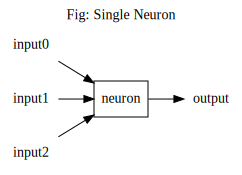

In [ ]:
# @title
%%graph
rankdir=LR
input0 [shape=none]
input0-> neuron
input1 [shape=none]
input1-> neuron
input2 [shape=none]
input2-> neuron
neuron [shape=box]
neuron -> output
output [shape=none]
labelloc="t"; label="Fig: Single Neuron";


As an example use case for classification, we can use a single neuron to predict whether an athlete is a *gymnast* or *basketball player* based upon a single input, the athlete's weight. More specifically, we will use a single neuron that will output a probability estimate that the input represents a basketball players weight.


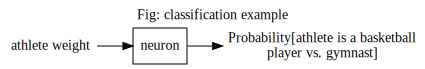

In [ ]:
# @title
%%graph
rankdir=LR
"athlete weight" [shape=none]
"athlete weight"-> neuron
neuron [shape=box]
neuron -> "Probability[athlete is a basketball\n player vs. gymnast]"
"Probability[athlete is a basketball\n player vs. gymnast]" [shape=none]
labelloc="t"; label="Fig: classification example";

### Classification Example: Basketball vs. Gymnastics from Athlete Weight

Here we specifically define the example problem which will help us understand how a neuron works.  

Lets say we have a bus full of student athletes who play just two different sports: **basketball** and **gymnastics** (i.e. we say these are the two ***classes*** in a ***classification*** problem). We want to be able to identify what sport the athlete plays from their weight alone.  

The code cell below stores the data on twelve athletes. The **X** variable stores each athelete's weight. The **y** variable holds the athlete's class (0 represents gymnastics, 1 represents basketball). Since each data point (athelete) has only a single piece of data associated with them (i.e. their weight), we say the input is 1-dimensional.  

So the input is an athlete's weight, the desired output is a predicted probability that the athlete is a given class.


In [1]:
# 1d DATA: WEIGHTS OF BASKETBALL & GYMNASTICS ATHLETES

import numpy as np
import matplotlib.pyplot as plt

#  X is the input
X = np.array([[175],[210],[145],[205],[190],[155],[105],[150],[120],[115],[110],[107]])

#  y is the class: 1 = basketball, 0 = gymnastics
y = np.array([1,1,1,1,1,1, 0,0,0,0,0,0]) #

print('# data samples:', X.shape[0])
print('input dimension:', X.shape[1])


# data samples: 12
input dimension: 1


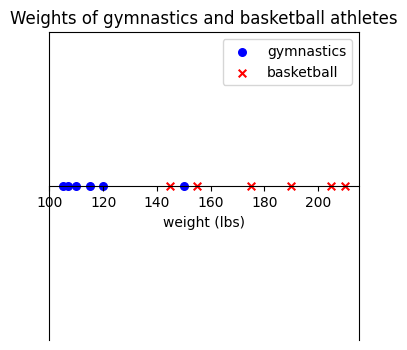

In [2]:
# PLOTTING 1d BASKETBALL vs. GYMNASTICS DATA

# note we use np.zeros for the y values since data is 1-dimensional
def plot_1d_example():
  plt.figure(figsize=(4,4))
  plt.scatter(X[y==0,0], np.zeros([sum(y==0)]), s=30, c='b', marker='o')
  plt.scatter(X[y==1,0], np.zeros([sum(y==1)]), s=30, c='r', marker='x')
  plt.xlabel('weight (lbs)')
  plt.legend(['gymnastics', 'basketball'])
  plt.title('Weights of gymnastics and basketball athletes')
  ax = plt.gca()
  ax.get_yaxis().set_visible(False)
  ax.spines['bottom'].set_position('zero')
  plt.show()

plot_1d_example()

### Mathematical representation of a neuron

In the figure below, we represented a neuron as a just a box. Inside that box are a bunch of mathematical steps, which converts the input into a class prediction probability. More specifically, a neuron has a summing step and an activation function step.


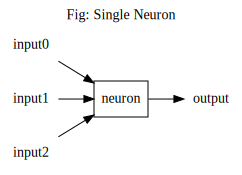

In [ ]:
# @title
%%graph
rankdir=LR
input0 [shape=none]
input0-> neuron
input1 [shape=none]
input1-> neuron
input2 [shape=none]
input2-> neuron
neuron [shape=box]
neuron -> output
output [shape=none]
labelloc="t"; label="Fig: Single Neuron";

The figure below shows the neuron box replaced by the two bubbles for the summartion and activation function steps.  

### Summation Step
In the summation step:
* **Each input is multiplied with a parameter specific to it.** In other words, input0 is multiplied by w0, input1 is multiplied by w1, and so on. The parameters w0, w1, etc are called ***weights***.
* All of products are then summed together along with a ***threshold** parameter. The threshold is also often called the bias parameter or represented by the greek letter tau ($\tau$).  
* The resulting sum is then passed to the ***activation function***.

The summation step can be mathematically expressed as:

$$[\sum_{i=0}^{d-1}input_i*w_i]-\tau$$

Where ***d*** is the dimension of the input.


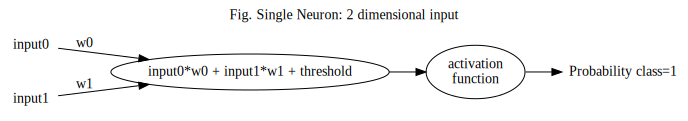

In [ ]:
# @title
%%graph
rankdir=LR
input0 [shape=none]
input1 [shape=none]
input0-> "input0*w0 + input1*w1 + threshold" [label="w0"]
input1-> "input0*w0 + input1*w1 + threshold" [label="w1"]
"input0*w0 + input1*w1 + threshold"-> "activation\nfunction" -> "Probability class=1"
"Probability class=1" [shape=none]
labelloc="t"; label="Fig. Single Neuron: 2 dimensional input";


### Activation function
There are many different commonly used activation functions. Recall in our example we want the final output of the neuron to be a probability; thus the output should be able to vary between 0 and 1. What is known as the ***sigmoid function*** is commonly used to represent an output probability.  

The formula for the sigmoid function is:

$$sigmoid(x) = \frac {e^{x}}{e^{x} + 1}$$

Where ***e*** is Euler's number, (i.e. 2.71828...),  a special number like $\pi$ that has mathematical significance in many fields.

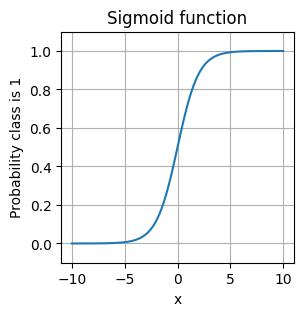

In [3]:
# @title
import matplotlib.pyplot as plt
import numpy as np

def plot_sigmoid(w,thresh, range=[-10,10] ,ax=None):
  if ax == None:
    #plt.figure()
    ax = plt.gca()

  x = np.linspace(range[0],range[1],100)
  yhat = np.exp(w*x+thresh)/(np.exp(w*x+thresh) + 1)
  ax.plot(x,yhat)
  ax.grid(True)
  ax.set_title("Sigmoid function")
  ax.set_xlabel('x')
  ax.set_ylabel('Probability class is 1')
  ax.set_ylim([-0.1,1.1])

plt.figure(figsize=(3,3))
plot_sigmoid(1,0)

### Formal representation of a single neuron

Typically when talking about neural networks inputs are expressed as X, where X has d dimensions.

$$x=\begin{bmatrix}
x_0\\
x_1\\
x_2\\
...\\
x_{d-1}
\end{bmatrix}$$

We can similarly represent the weights (w) as a vector too:

$$w=\begin{bmatrix}
w_0\\
w_1\\
w_2\\
...\\
w_{d-1}
\end{bmatrix}$$


Combing the summation step and sigmoid activation function steps, we can write the neural network output as:

$$NNoutput(x) = \frac {e^{\sum_{i=0}^{d-1}[w_ix_i]+\tau}}{e^{\sum_{i=0}^{d-1}[w_ix_i]+\tau} + 1}$$

Note that the number of parameters for a single neuron are d + 1: there are d weights (, and 1 bias.

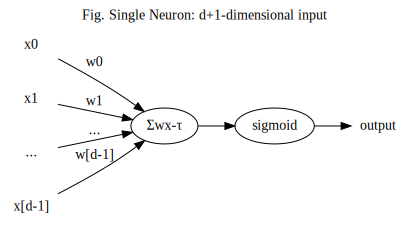

In [ ]:
# @title
%%graph
rankdir=LR
x0 [shape=none]
x1 [shape=none]
"..." [shape=none]
"x[d-1]" [shape=none]
x0-> "Σwx-τ"[label="w0"]
x1-> "Σwx-τ"[label="w1"]
"..."-> "Σwx-τ"[label="..."]
"x[d-1]"-> "Σwx-τ"[label="w[d-1]"]
"Σwx-τ"-> sigmoid -> output
output [shape=none]
labelloc="t"; label="Fig. Single Neuron: d+1-dimensional input";

### Fitting 1d data with a single neuron

Back to our example problem, can we use an artificial neuron to help us predict whether a student athlete is a basketball player or gymnist from just their weight? We saw above how the output of a sigmoid function smoothly varies from 0 to 1 as its input varies.  Can we use a shifted sigmoid graph to represent how likely a student is to be a basketball player based upon their weight?  


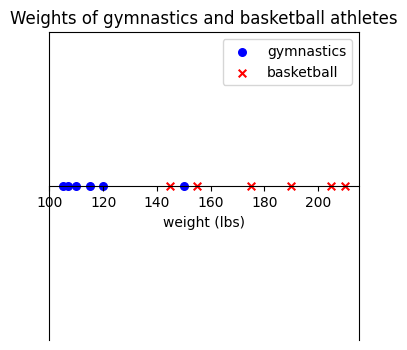

In [4]:
plot_1d_example()


Looking at the line plot of weights for basketball players and gymnists, we see that as the athlete weight goes from low to high, it changes from being mostly gymnists to mostly basketball players.  

If we were to estimate the probability of being a basketball player, we might estimate that:
* the probability is near zero for weights less than 120
* the probability is about 50% at a weight of about 147.5
* the probability is near 100% for weights above 200.

Can we pick the artificial neuron's three parameters to create a probability graph over weight that matches these properties?  Recall that for 1 dimensional input data, an artificial neuron has only two parameters, w0 and tau.

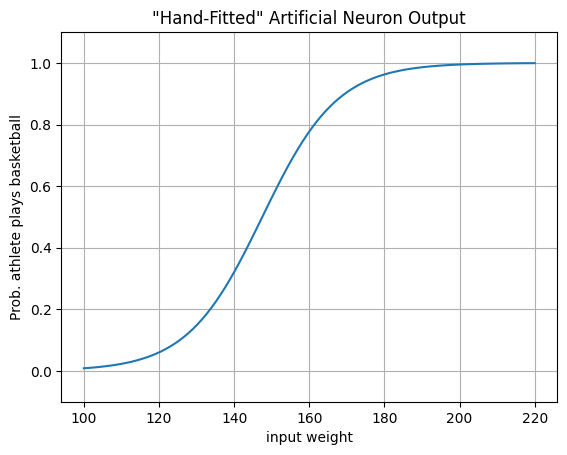

In [5]:
# FITTING AN ARTIFICIAL NEURON

# set parameters
threshold = 147.5
w0 = .1

plot_sigmoid(w0,-w0*threshold,[100,220])
plt.title('"Hand-Fitted" Artificial Neuron Output')
plt.xlabel('input weight')
plt.ylabel('Prob. athlete plays basketball')
plt.show()

Instead of hand-fitting the neron by coming up with the parameters on our own, we can use **Keras** and **TensorFlow** to automatically fit the neuron for us.

In [13]:
# Fit a single neuron using keras
from keras.models import Sequential
from keras.layers import Dense

# A sequential model is one that sequentially feeds each new layer into the
# the next layer.
model = Sequential()

# Add a single layer with a single neuron (unit).
# In a Dense layer, each unit connects to everything out of previous layer
model.add(Dense(units=1, input_shape=(1,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9167 - loss: 0.4953
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9167 - loss: 0.4953
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9167 - loss: 0.4953
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9167 - loss: 0.4952
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9167 - loss: 0.4952
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9167 - loss: 0.4951
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9167 - loss: 0.4951
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9167 - loss: 0.4950
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.9167 - loss: 0.4950
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9167 - loss: 0.4950
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9167 - loss: 0.4949
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9167 - loss:

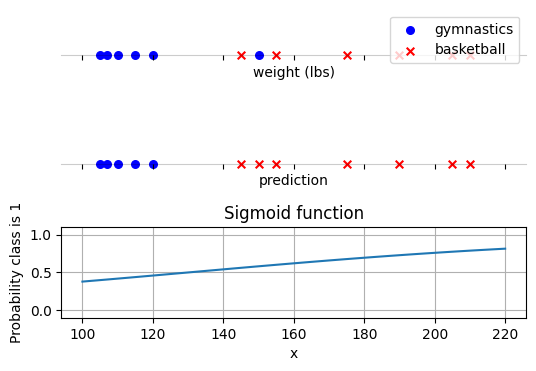

In [17]:
model.fit(X, y, epochs=50, verbose=1)

[w0],threshold = model.layers[0].get_weights()
print('w0:', w0, '\ntheshold: ', threshold)

ypred = (model.predict(X) >= 0.5).astype(int)[:,0]
accuracy = sum(ypred == y)/y.size
print('accuracy: ', accuracy)

fig, axes = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(6, 4))

axes[0].scatter(X[y==0,0], np.zeros([sum(y==0)]), s=30, c='b', marker='o')
axes[0].scatter(X[y==1,0], np.zeros([sum(y==1)]), s=30, c='r', marker='x')
axes[0].set_xlabel('weight (lbs)')
axes[0].legend(['gymnastics', 'basketball'])
#ax = plt.gca()
axes[0].get_yaxis().set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['bottom'].set_alpha(0.2)


axes[1].scatter(X[ypred==0,0], np.zeros([sum(ypred==0)]), s=30, c='b', marker='o')
axes[1].scatter(X[ypred==1,0], np.zeros([sum(ypred==1)]), s=30, c='r', marker='x')
axes[1].set_xlabel('prediction')
#ax = plt.gca()
axes[1].get_yaxis().set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['bottom'].set_alpha(0.2)


plot_sigmoid(w0, threshold, [100,220], axes[2])

plt.show()

### Example 2: 2d DATA: lengths and widths of roses and daises

In this example, there are again two classes: roses and daises. We represent the classes below in the y variable, 0 for daises, 1 for roses.  y is a 1-dimensional ndarray with a size of 12. In other words, y's sole dimension represents the sample index or flower index. y[0] gives us the class of the first flower, y[5] gives us the class of the 6th flower, y[11] gives us the class of the last (12th) flower.  

Note how X2 now has two numbers for each data point, the first number representing a flowers length and the second number representing a flowers width. X2 is a 2 dimensional ndarray: the first dimension represents the data sample index (which can vary from 0 to 11), the second dimension represents the input dimension (which can be either 0 or 1).  

    X2[0]  - this returns the first flower's length and width  
    X2[0,0]  - this gives the first flowers length  
    x2[5,1]  - this is the 6th flower's width  
    x2[:,0]  - this returns all lengths  
    x2[:,0]  - this returns all widths
    x2[y==0] - this returns lengths and widths of daisies only  
    x2[y==1,0] - this returns lengths of roses only  


In [19]:
#  2d DATA: LENGTH AND WIDTH OF ROSES AND DAISIES

# X = [
#      [flower0_length, flower0_width],
#      [flower1_length, flower1_width],
#      [flower2_length, flower2_width],
#       ]
X2 = np.array([
     [11.5, 3.1],
     [12.1, 3.6],
     [11.3, 3.7],
     [11.9, 3.9],
     [12.4, 3.2],
     [11.8, 3.3],
     [9.5, 3.6],
     [11.1, 4.1],
     [10.3, 4.2],
     [10.9, 4.7],
     [11.4, 3.7],
     [10.8, 3.8],
    ])

#  y is the class: 1 = roses, 0 = daisies
y2 = np.array([0,0,0,0,0,0, 1,1,1,1,1,1])

print('# data samples:', X2.shape[0])
print('input dimension:', X2.shape[1])

# data samples: 12
input dimension: 2


Below we plot the data on a 2d graph. Take note of plt.scatter lines and how the classes and flower lengths and widths are extracted from X2.

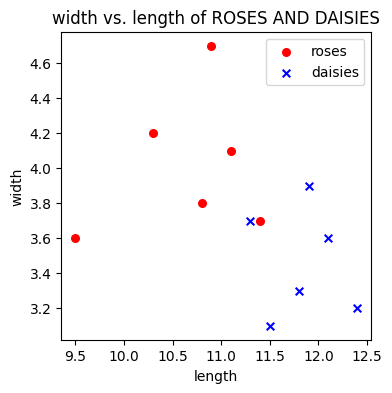

In [20]:
# PLOTTING 2d ROSES AND DAISIES DATA

# Note how with the 2d data, the 0th dim is used as x and the 1st dim used as y
plt.figure(figsize=(4,4))
plt.scatter(X2[y==0,0], X2[y==0,1], s=30, c='r', marker='o')
plt.scatter(X2[y==1,0], X2[y==1,1], s=30, c='b', marker='x')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(['roses', 'daisies'])
plt.title('width vs. length of ROSES AND DAISIES')
plt.show()

### Fitting 2d example with Keras


In [21]:
# Implement LogisticRegression as a neural network using keras
from keras.layers import Dense
from keras.models import Sequential

model2 = Sequential()

# Add a single layer with a single neuron
model2.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model2.fit(X2, y2, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - acc: 0.5000 - loss: 3.9018
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.5000 - loss: 3.5749
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.5000 - loss: 3.2485
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.5000 - loss: 2.9229
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.5000 - loss: 2.5989
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - acc: 0.5000 - loss: 2.2777
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.5000 - loss: 1.9619
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.5000 - loss: 1.6559
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.5000 - loss: 1.3671
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.5000 - loss: 1.1061
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.5000 - loss: 0.8852
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.5000 - loss: 0.7135
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/st




Consider the problem of determining whether a student athlete plays basketball or rugby based upon their weight. We make the neuron's single input the weight, and we want the output to represent the probability that the student is a football player.

As shown



In [ ]:
# @title
# add ability to make graph figures
from graphviz import Source
from IPython.core.magic import register_cell_magic

@register_cell_magic
def graph(line, cell):
  src = "digraph {%s}" % cell
  g = Source(src)
  if line:
    name = line.split()[0]
    globals()[name] = g
  else:
    return g

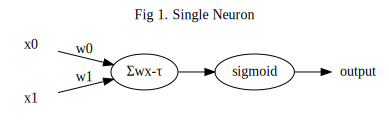

In [ ]:
# @title
%%graph
rankdir=LR
x0 [shape=none]
x1 [shape=none]
x0-> "Σwx-τ"[label="w0"]
x1-> "Σwx-τ"[label="w1"]
"Σwx-τ"-> sigmoid -> output
output [shape=none]
labelloc="t"; label="Fig 1. Single Neuron";